#Nueral Network Assignment-1
###Tejus Vidyadhar Kusur

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
#Loading training and testing datasets
training_df = pd.read_excel("Datasheets/training_feature_matrix.xlsx", header=None)
x_train_orig = training_df.to_numpy()
train_op_df = pd.read_excel("Datasheets/training_output.xlsx", header=None)
y_train_orig = train_op_df.to_numpy()
y_train_orig = np.delete(y_train_orig, 0)
y_train_orig = y_train_orig.reshape([-1,1])
testing_df = pd.read_excel("Datasheets/test_feature_matrix.xlsx", header=None)
x_test_orig = testing_df.to_numpy()
test_op_df = pd.read_excel("Datasheets/test_output.xlsx", header=None)
y_test_orig = test_op_df.to_numpy()

assert(x_train_orig.shape[0] == y_train_orig.shape[0])

In [4]:
#Normalising function using the min-max normalization
def normalize(features):
    """min-max normalization of provided feature matrix

    Args:
        features (matrix): a matrix of input parameters x1, x2, ... xn

    Returns:
        features: normalized feature matrix
        fmin: calculated minimum
        frange: calculated range
    """

    fmin = np.min(features)
    frange = np.max(features, axis=0) - np.min(features, axis=0)
    features -= fmin

    features /= frange

    return features, fmin, frange

In [5]:
#Normalising the datasets using the normalising function
x_train_normalized, _, _ = normalize(x_train_orig)
x_test_normalized, _, _ = normalize(x_test_orig)
y_train, y_train_fmin, y_train_frange = normalize(y_train_orig)
y_test, y_test_fmin, y_test_frange = normalize(y_test_orig)


In [6]:
def denormalize(features, fmin, frange):
    """min-max de-normalization of provided feature matrix

    Args:
        features (matrix): a normalized matrix of input parameters x1, x2, ... xn
        fmin: calculated minimum
        frange: calculated range

    Returns:
        features: de-normalized feature matrix
        
    """
    features = features * frange
    features = features - fmin
    return features

In [7]:
#Adding ones for the bias column and calculating the number of elements for batch grade descent
m_train = x_train_normalized.shape[0]
m_test = x_test_normalized.shape[0]
x_train = np.insert(x_train_normalized, 0, np.ones(m_train), axis=1)
x_test = np.insert(x_test_normalized, 0, np.ones(m_test), axis=1)

In [8]:
#Hypothesis function
def hypothesis(theta, x):
    """hypothesis function for linear regression

    Args:
        theta ([float]): an array of weights; size n
        x ([float]): feature element for making predictions

    Returns:
        [float]: array of predicted output values for calculating MSE
    """

    hw = 0
    for i in range(theta.shape[0]):
      hw += theta[i] * x[i]
    return hw

##Question 1

In [8]:
def propagate(theta, X, Y):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    m = X.shape[0]
    n = theta.shape[0]
    cost = 0
    grad = np.zeros([n,1])
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        #hw = 0
        #for j in range(n):
        #    hw += theta[j] * X[i][j]
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        for j in range(n):
            grad[j] = grad[j] + 1/m * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

    assert(grad.shape == theta.shape)
    cost = np.squeeze(cost)

    return grad, cost

In [9]:
def optimize(theta, X, Y, num_iter, alpha):
    """
    This function optimizes theta by running a batch gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        # Cost and gradient calculation
        grad, cost = propagate(theta, X, Y)
        
        # update rule 
        for j in range(theta.shape[0]):
            theta[j] = theta[j] - alpha * grad[j]

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [10]:
#Main Implementation
alpha = 0.01
num_iter = 100
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = optimize(theta, x_train, y_train, num_iter, alpha)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.083645
Cost after iteration 20: 0.035943
Cost after iteration 40: 0.024770
Cost after iteration 60: 0.022151
Cost after iteration 80: 0.021535
Final Weight parameters (normalized): [0.09379751 0.09082635 0.12683799]


Text(0, 0.5, &#39;cost&#39;)

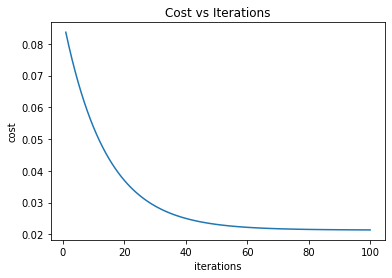

In [11]:
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Cost vs Iterations")
plt.xlabel('iterations')
plt.ylabel('cost')

Text(0.5, 0, &#39;Theta2&#39;)

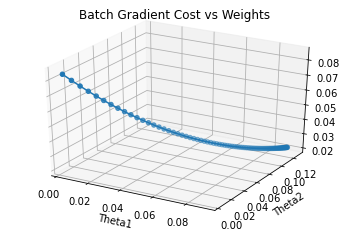

In [12]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Batch Gradient Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [16]:
# printing training and testing mse values

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 18.243432322087724
Testing MSE: 20.522998630185523


##Question 2##

In [17]:
#Stochastic propagation
def stoc_propagate(theta, X, Y, alpha):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    m = X.shape[0]
    n = theta.shape[0]
    cost = 0
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        # update rule 
        for j in range(n):
            theta[j] = theta[j] - alpha * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

        #theta = theta - (alpha * ((hw - Y[i]) * X[i])

    cost = np.squeeze(cost)

    return theta, cost

In [18]:
#Stochastic optimisation
def stoc_optimize(theta, X, Y, num_iter, alpha):
    """
    This function optimizes theta by running a stochastic gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        # Cost and gradient calculation
        theta, cost = stoc_propagate(theta, X, Y, alpha)

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [36]:
#Stochastic Main Implementation
alpha = 0.0005
num_iter = 100
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = stoc_optimize(theta, x_train, y_train, num_iter, alpha)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.062943
Cost after iteration 20: 0.021346
Cost after iteration 40: 0.021312
Cost after iteration 60: 0.021281
Cost after iteration 80: 0.021254
Final Weight parameters (normalized): [0.07260502 0.07760377 0.15926137]


Text(0, 0.5, &#39;cost&#39;)

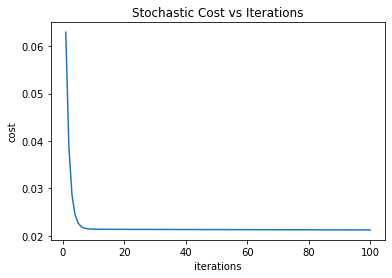

In [37]:
#Stochastic cost vs iterations
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Stochastic Cost vs Iterations")
plt.xlabel('iterations')
plt.ylabel('cost')

Text(0.5, 0, &#39;Theta2&#39;)

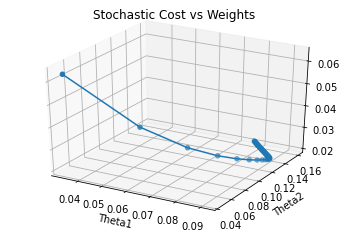

In [38]:
# Stochastic 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Stochastic Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [23]:
# printing training and testing mse values for stochastic descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 28.3841496061412
Testing MSE: 22.7238381843817


In [174]:
#Mini batch propagation

def mini_propagate(theta, X, Y, m):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    n = theta.shape[0]
    cost = 0
    grad = np.zeros([n,1])
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        #hw = 0
        #for j in range(n):
        #    hw += theta[j] * X[i][j]
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        for j in range(n):
            grad[j] = grad[j] + 1 / m * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

    assert(grad.shape == theta.shape)
    cost = np.squeeze(cost)

    return grad, cost

In [175]:
#Mini batch optimisation

def mini_optimize(theta, X, Y, num_iter, alpha, m):
    """
    This function optimizes theta by running a mini batch gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        Xbatch = np.random.permutation(X)[0:m]

        # Cost and gradient calculation
        grad, cost = mini_propagate(theta, Xbatch, Y, m)
        
        # update rule 
        for j in range(theta.shape[0]):
            theta[j] = theta[j] - alpha * grad[j]

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [176]:
#Mini batch main Implementation
alpha = 0.01
num_iter = 100
m = 20 #batch size
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = mini_optimize(theta, x_train, y_train, num_iter, alpha, m)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.031944
Cost after iteration 20: 0.014035
Cost after iteration 40: 0.009647
Cost after iteration 60: 0.008764
Cost after iteration 80: 0.007618
Final Weight parameters: [0.06136566 0.05735786 0.07417338]


Text(0, 0.5, &#39;cost&#39;)

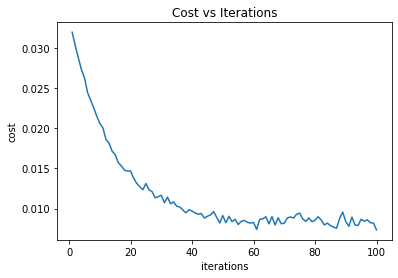

In [100]:
#Mini batch cost vs iterations
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Mini Batch Cost vs Iterations")
plt.xlabel('Iterations')
plt.ylabel('Cost')

Text(0.5, 0, &#39;Theta2&#39;)

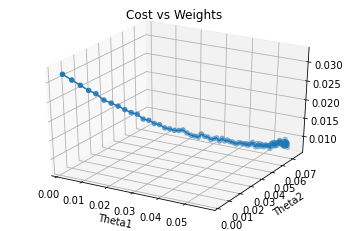

In [101]:
# Mini batch 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Mini Batch Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [24]:
# printing training and testing mse values for mini batch descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 28.3841496061412
Testing MSE: 22.7238381843817


##Question 3##

In [39]:
#Ridge batch gradient regression progression function

def ridge_batch_propagate(theta, X, Y):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    m = X.shape[0]
    n = theta.shape[0]
    cost = 0
    grad = np.zeros([n,1])
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        #hw = 0
        #for j in range(n):
        #    hw += theta[j] * X[i][j]
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        for j in range(n):
            grad[j] = grad[j] + 1 / m * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

    assert(grad.shape == theta.shape)
    cost = np.squeeze(cost)

    return grad, cost

In [40]:
#Ridge batch gradient regression optimisation function

def ridge_batch_optimize(theta, X, Y, num_iter, alpha, _lambda):
    """
    This function optimizes theta by running a ridge batch gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        # Cost and gradient calculation
        grad, cost = ridge_batch_propagate(theta, X, Y)
        
        # update rule 
        for j in range(theta.shape[0]):
            theta[j] = ((1 - alpha * _lambda) * theta[j]) - alpha * grad[j]

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [52]:
#Ridge batch descent main Implementation
alpha = 0.01
_lambda = 0.25
num_iter = 100
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = ridge_batch_optimize(theta, x_train, y_train, num_iter, alpha, _lambda)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.083645
Cost after iteration 20: 0.036610
Cost after iteration 40: 0.025656
Cost after iteration 60: 0.022871
Cost after iteration 80: 0.022065
Final Weight parameters (normalized): [0.08831544 0.08548535 0.11910834]


Text(0, 0.5, &#39;Cost&#39;)

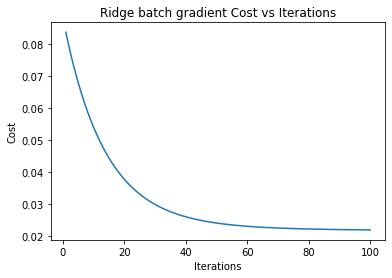

In [53]:
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Ridge batch gradient Cost vs Iterations")
plt.xlabel('Iterations')
plt.ylabel('Cost')

Text(0.5, 0, &#39;Theta2&#39;)

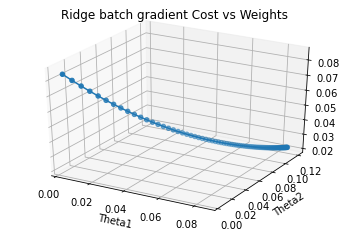

In [54]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Ridge batch gradient Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [30]:
# printing training and testing mse values for ridge batch descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 28.3841496061412
Testing MSE: 22.7238381843817


In [55]:
#Ridge Stochastic propagation
def ridge_stoc_propagate(theta, X, Y, alpha, _lambda):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    m = X.shape[0]
    n = theta.shape[0]
    cost = 0
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        # update rule 
        for j in range(n):
            theta[j] = (1 - alpha * _lambda) * theta[j] - alpha * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

        #theta = theta - (alpha * ((hw - Y[i]) * X[i])

    cost = np.squeeze(cost)

    return theta, cost

In [56]:
#Ridge Stochastic optimisation
def ridge_stoc_optimize(theta, X, Y, num_iter, alpha, _lambda):
    """
    This function optimizes theta by running a stochastic gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        # Cost and gradient calculation
        theta, cost = ridge_stoc_propagate(theta, X, Y, alpha, _lambda)

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [67]:
#Stochastic Main Implementation
alpha = 0.0005
_lambda = 0.25
num_iter = 100
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = ridge_stoc_optimize(theta, x_train, y_train, num_iter, alpha, _lambda)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.063082
Cost after iteration 20: 0.021620
Cost after iteration 40: 0.021606
Cost after iteration 60: 0.021599
Cost after iteration 80: 0.021595
Final Weight parameters (normalized): [0.08342639 0.08255582 0.12891211]


Text(0, 0.5, &#39;cost&#39;)

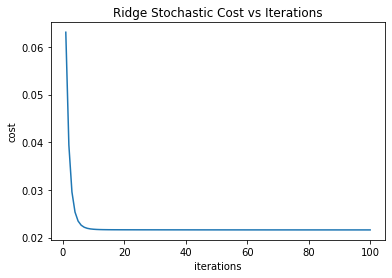

In [68]:
#Ridge Stochastic cost vs iterations
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Ridge Stochastic Cost vs Iterations")
plt.xlabel('iterations')
plt.ylabel('cost')

Text(0.5, 0, &#39;Theta2&#39;)

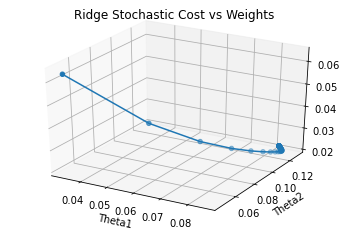

In [69]:
# Ridge Stochastic 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Ridge Stochastic Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [36]:
# printing training and testing mse values for ridge stochastic descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 35.45678698053086
Testing MSE: 26.04488448554084


In [37]:
#Ridge Mini batch propagation

def ridge_mini_propagate(theta, X, Y, m):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    cost -- cost for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    n = theta.shape[0]
    cost = 0
    grad = np.zeros([n,1])
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        #hw = 0
        #for j in range(n):
        #    hw += theta[j] * X[i][j]
        hw = hypothesis(theta, X[i])

        cost += 1/(2*m) * ((hw - Y[i]) ** 2) #compute cost
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        for j in range(n):
            grad[j] = grad[j] + 1 / m * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

    assert(grad.shape == theta.shape)
    cost = np.squeeze(cost)

    return grad, cost

In [38]:
#Ridge Mini batch optimisation

def ridge_mini_optimize(theta, X, Y, num_iter, alpha, m, _lambda):
    """
    This function optimizes theta by running a ridge mini batch gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    _lambda -- Regularization factor
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    costlist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,3])
    
    for i in range(num_iter):
        
        Xbatch = np.random.permutation(X)[0:m]

        # Cost and gradient calculation
        grad, cost = ridge_mini_propagate(theta, Xbatch, Y, m)
        
        # update rule 
        for j in range(theta.shape[0]):
            theta[j] = (1 - alpha * _lambda) * theta[j] - alpha * grad[j]

        costlist[i] = np.squeeze(cost)
        thetalist[i] = np.squeeze(theta)
        
        # Print the cost every 100 training iterations
        if i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    

    return theta, thetalist, costlist

In [39]:
#Mini batch main Implementation
alpha = 0.01
_lambda = 0.25
num_iter = 100
m = 20 #batch size
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, costlist = ridge_mini_optimize(theta, x_train, y_train, num_iter, alpha, m, _lambda)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Cost after iteration 0: 0.031944
Cost after iteration 20: 0.013997
Cost after iteration 40: 0.010756
Cost after iteration 60: 0.008513
Cost after iteration 80: 0.009449
Final Weight parameters (normalized): [0.05695947 0.05264678 0.07063637]


Text(0, 0.5, &#39;Cost&#39;)

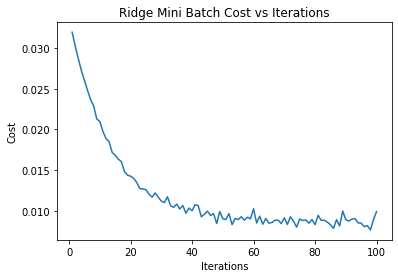

In [40]:
#Ridge Mini batch cost vs iterations
m = [x for x in range(1, num_iter+1)]
plt.plot(m, costlist)
plt.title("Ridge Mini Batch Cost vs Iterations")
plt.xlabel('Iterations')
plt.ylabel('Cost')

Text(0.5, 0, &#39;Theta2&#39;)

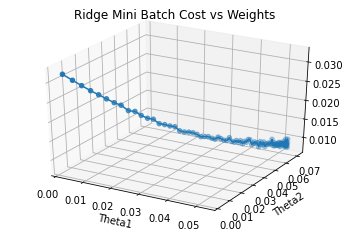

In [41]:
# Ridge Mini batch 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
thetaX = thetalist[:,1]
thetaY = thetalist[:,2]
costlist = np.squeeze(costlist)
ax.scatter(thetaX, thetaY, costlist)
ax.plot(thetaX, thetaY, costlist)
plt.title("Ridge Mini Batch Cost vs Weights")
plt.xlabel("Theta1")
plt.ylabel("Theta2")

In [42]:
# printing training and testing mse values for ridge mini batch descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 48.69155805306529
Testing MSE: 29.844259647566073


##Question-4##
LARS Weight Update Rule Derivation
<img src="LARS Derivation.png">

##Question-5##

In [43]:
#Vectorization based linear regression
def vect_optimize(X, Y):
    """
    This function optimizes theta by vectorization linear regression algorithm
    
    Arguments:
    X -- feature matrix
    Y -- output feature matrix
    
    
    Returns:
    theta -- dictionary containing the weights
    cost -- cost computed during the optimization.

    """
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    cost = 1/2 * (Y.T.dot(Y) - Y.T.dot(X).dot(w) - w.T.dot(X.T).dot(Y)+w.T.dot(X.T).dot(X).dot(w))

    return w, cost

In [44]:
#Vectorization linear regression main Implementation

theta, cost = vect_optimize(x_train, y_train)

print("Final Weight parameters (normalized):", np.squeeze(theta))

Final Weight parameters (normalized): [-0.06221174965802926 0.06644076481714141 0.2730929947197171]


In [45]:
# printing training and testing mse values for vectorized linear descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 17.983339274379286
Testing MSE: 19.053263863791702


In [46]:
#Vectorization based ridge regression
def ridge_vect_optimize(X, Y, _lambda):
    """
    This function optimizes theta by vectorization ridge regression algorithm
    
    Arguments:
    X -- feature matrix
    Y -- output feature matrix
    
    
    Returns:
    theta -- dictionary containing the weights
    cost -- cost computed during the optimization.

    """
    I = np.identity(X.shape[1])
    w = np.linalg.inv(X.T.dot(X) + _lambda*I).dot(X.T).dot(Y)
    cost = 1/2 * (Y.T.dot(Y) - Y.T.dot(X).dot(w) - w.T.dot(X.T).dot(Y)+w.T.dot(X.T).dot(X).dot(w)) + _lambda/2 * w.T.dot(w)

    return w, cost

In [47]:
#Vectorization ridge regression main Implementation

_lambda = 0.25
theta, cost = ridge_vect_optimize(x_train, y_train, _lambda)

print("Final Weight parameters (normalized):", np.squeeze(theta))

Final Weight parameters (normalized): [-0.04959422481696176 0.06354976049786577 0.26539796723151493]


In [48]:
# printing training and testing mse values for vectorized ridge descent

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 17.905569601135696
Testing MSE: 19.081658305462764


In [49]:
#Vectorization based least angle regression
def ridge_vect_optimize(X, Y, _lambda):
    """
    This function optimizes theta by vectorization ridge regression algorithm
    
    Arguments:
    X -- feature matrix
    Y -- output feature matrix
    
    
    Returns:
    theta -- dictionary containing the weights
    cost -- cost computed during the optimization.

    """
    I = np.identity(X.shape[1])
    w = np.linalg.inv(X.T.dot(X) + _lambda/2*I).dot(X.T).dot(Y)
    cost = 1/2 * (Y.T.dot(Y) - Y.T.dot(X).dot(w) - w.T.dot(X.T).dot(Y)+w.T.dot(X.T).dot(X).dot(w)) + _lambda/2 * np.linalg.norm(w)

    return w, cost

In [50]:
#Vectorization least angle regression main Implementation

_lambda = 0.25
theta, cost = ridge_vect_optimize(x_train, y_train, _lambda)

print("Final Weight parameters (normalized):", np.squeeze(theta))

Final Weight parameters (normalized): [-0.05561530343178321 0.06485241633254207 0.2691291313784406]


In [51]:
# printing training and testing mse values for vectorized least angle regression

y_predicted = np.zeros(m_train)
for i in range(m_train):
  y_predicted[i] = hypothesis(theta, x_train[i])
y_predicted = denormalize(y_predicted, y_train_fmin, y_train_frange)
mse_training = np.mean((y_predicted - y_train_orig)**2)
print("Training MSE:", mse_training)
y_predicted = np.zeros(m_test)
for i in range(m_test):
  y_predicted[i] = hypothesis(theta, x_test[i])
y_predicted = denormalize(y_predicted, y_test_fmin, y_test_frange)
mse_testing = np.mean((y_predicted - y_test_orig)**2)
print("Testing MSE:", mse_testing)

Training MSE: 17.94242916184263
Testing MSE: 19.067197136161056


##Question 6##
K means Clustering

In [9]:
#Reading the dataset
fmatrix_df = pd.read_excel("Datasheets/data2.xlsx", header=None)
fmatrix = fmatrix_df.to_numpy()
fmartix = fmatrix.astype(float)

In [10]:
#Assigning number of clusters, tolerance and maximum allowed number of iterations
k = 3
tolerance = 0.001
max_iter = 2000

In [11]:
#Initialising the centroids at distance 1/4, 1/2 and 3/4 the dataset
centroids = list()
for i in range(1,k+1):
	centroids.append(fmatrix[(fmatrix.shape[0] * i) // 4])

In [12]:
#Classification loop
for i in range(max_iter):
    classes = {}
    for i in range(k):
        classes[i] = []
    #Finding the distance between the feature and cluster; then choosing the nearest centroid
    for features in fmatrix:
        distances = [np.linalg.norm(features - centroid) for centroid in centroids]
        classification = distances.index(min(distances))#
        classes[classification].append(features.reshape([1,-1]))

    previous = centroids.copy()
    #average the cluster datapoints to re-calculate the centroids
    for classification in classes:
        centroids[classification] = np.average(classes[classification], axis = 0)
    #Setting the termination condition
    optiCond = True
    for centroid in range(len(centroids)):
        original_centroid = previous[centroid]
        curr = centroids[centroid]

        #Terminate if the results are optimal, ie. the centroids don't change their positions much (< tolerance)
        if np.sum((curr - original_centroid)/original_centroid * 100.0) > tolerance:
            optiCond = False
            break
    if optiCond:
        break

In [13]:
#Printing the found centroids
for i in centroids:
    print(i)

[[5.006 3.418 1.464 0.244]]
[[5.9016129  2.7483871  4.39354839 1.43387097]]
[[6.85       3.07368421 5.74210526 2.07105263]]


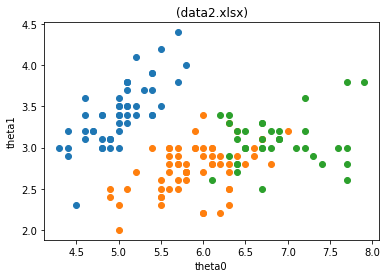

In [7]:
#Plotting class labels for theta0 vs theta1 graph
x_0_0=np.squeeze(np.array(classes[0]))[:,0]   # 1st feature having label as 0               
x_1_0=np.squeeze(np.array(classes[0]))[:,1]   # 2nd feature having label as 0
x_0_1=np.squeeze(np.array(classes[1]))[:,0]   # 1st features having label as 1
x_1_1=np.squeeze(np.array(classes[1]))[:,1]   # 2nd features having label as 1
x_0_2=np.squeeze(np.array(classes[2]))[:,0]   # 1st features having label as 2
x_1_2=np.squeeze(np.array(classes[2]))[:,1]   # 2nd features having label as 2

plt.scatter(x_0_0,x_1_0)
plt.scatter(x_0_1,x_1_1)
plt.scatter(x_0_2,x_1_2)
plt.title('(data2.xlsx)')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.show()

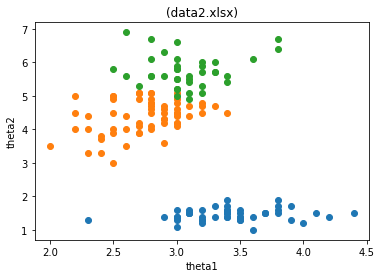

In [9]:
#Plotting class labels for theta1 vs theta2 graph
x_1_0=np.squeeze(np.array(classes[0]))[:,1]  # 2nd feature having label as 0                        
x_2_0=np.squeeze(np.array(classes[0]))[:,2]  # 3rd feature having label as 0        
x_1_1=np.squeeze(np.array(classes[1]))[:,1]  # 2nd feature having label as 1        
x_2_1=np.squeeze(np.array(classes[1]))[:,2]  # 3rd feature having label as 1      
x_1_2=np.squeeze(np.array(classes[2]))[:,1]  # 2nd feature having label as 2        
x_2_2=np.squeeze(np.array(classes[2]))[:,2]  # 3rd feature having label as 2

plt.scatter(x_1_0,x_2_0)
plt.scatter(x_1_1,x_2_1)
plt.scatter(x_1_2,x_2_2)
plt.title('(data2.xlsx)')
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.show()

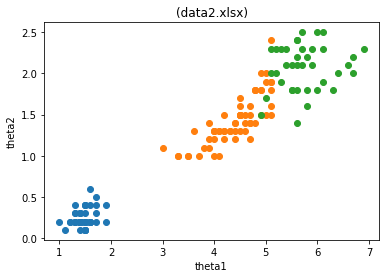

In [8]:
#Plotting class labels for theta2 vs theta3 graph
x_2_0=np.squeeze(np.array(classes[0]))[:,2]  # 3rd feature having label as 0                                  
x_3_0=np.squeeze(np.array(classes[0]))[:,3]  # 4th feature having label as 0                  
x_2_1=np.squeeze(np.array(classes[1]))[:,2]  # 3rd feature having label as 1                  
x_3_1=np.squeeze(np.array(classes[1]))[:,3]  # 4th feature having label as 1               
x_2_2=np.squeeze(np.array(classes[2]))[:,2]  # 3rd feature having label as 2                
x_3_2=np.squeeze(np.array(classes[2]))[:,3]  # 4th feature having label as 2

plt.scatter(x_2_0,x_3_0)
plt.scatter(x_2_1,x_3_1)
plt.scatter(x_2_2,x_3_2)
plt.title('(data2.xlsx)')
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.show()

##Question 7 
Logistic Regression

In [8]:
#Reading the dataset
fmatrix_df = pd.read_excel("Datasheets/data3.xlsx", header=None)
fmatrix = fmatrix_df.to_numpy()
fmatrix = np.delete(fmatrix, 0, 0)

In [9]:
#Hold out cross validation
m = fmatrix.shape[0]
fmartix_ho = np.random.permutation(fmatrix)
m_train = int(m*0.6)
m_test = m - m_train
x_train_orig = fmartix_ho[:,:-1][0:m_train]
y_train = fmartix_ho[:,-1][0:m_train]
x_test_orig = fmartix_ho[:,:-1][m_train:]
y_test = fmartix_ho[:,-1][m_train:]

In [10]:
#Normalising the data
x_train_normalized, _, _ = normalize(x_train_orig)
x_test_normalized, _, _ = normalize(x_test_orig)
y_train = y_train - 1 #Shifting y values to 0-1
y_test = y_test - 1 #Shifting y values to 0-1

In [11]:
#Adding the bias
x_train = np.insert(x_train_normalized, 0, np.ones(m_train), axis=1)
x_test = np.insert(x_test_normalized, 0, np.ones(m_test), axis=1)

In [20]:
#Defining the sigmoid function

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [13]:
def logi_propagate(theta, X, Y):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    loglikelihood -- likelihood for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    m = X.shape[0]
    n = theta.shape[0]
    #cost = 0
    loglikelihood = 0 #Log likelihood
    grad = np.zeros([n,1])
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        #hw = 0
        #for j in range(n):
        #    hw += theta[j] * X[i][j]
        hw = sigmoid(hypothesis(theta, X[i]))

        #cost += Y[i]*log(hw) + (1-Y[i])*log(1-hw)#compute cost
        loglikelihood += 1 * (Y[i]*np.log(hw)+(1-Y[i])*np.log(1-hw))
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        for j in range(n):
            grad[j] = grad[j] + 1/m * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

    assert(grad.shape == theta.shape)
    loglikelihood = np.squeeze(loglikelihood)

    return grad, loglikelihood # or cost

In [14]:
def logi_optimize(theta, X, Y, num_iter, alpha, print_value = False):
    """
    This function optimizes theta by running a batch gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    loglikelist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,X.shape[1]])
    
    for i in range(num_iter):
        
        # Cost and gradient calculation
        grad, loglikelihood = logi_propagate(theta, X, Y)
        
        # update rule 
        for j in range(theta.shape[0]):
            theta[j] = theta[j] - alpha * grad[j]

        loglikelist[i] = np.squeeze(loglikelihood)
        thetalist[i] = np.squeeze(theta)
        
        # Print the likelihood every 100 training iterations
        if i % 50 == 0 and print_value == True:
            print ("Likelihood after iteration %i: %f" %(i, loglikelihood))
    

    return theta, thetalist, loglikelist

In [15]:
#Main Implementation
alpha = 0.1
num_iter = 500
theta = np.zeros(shape=[x_train.shape[1], 1])

theta, thetalist, loglikelist = logi_optimize(theta, x_train, y_train, num_iter, alpha, True)
print("Final Weight parameters (normalized):", np.squeeze(theta))

Likelihood after iteration 0: -41.588831
Likelihood after iteration 50: -28.257232
Likelihood after iteration 100: -20.766892
Likelihood after iteration 150: -16.182163
Likelihood after iteration 200: -13.165738
Likelihood after iteration 250: -11.059079
Likelihood after iteration 300: -9.516300
Likelihood after iteration 350: -8.343066
Likelihood after iteration 400: -7.423424
Likelihood after iteration 450: -6.684548
Final Weight parameters (normalized): [-0.66665386  0.34877735 -2.30953728  2.96202516  2.88134638]


Text(0, 0.5, &#39;Loglikelihood&#39;)

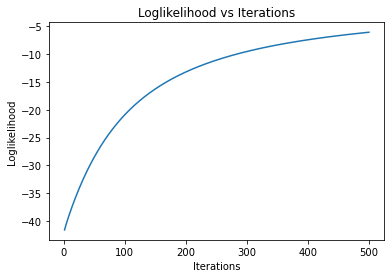

In [16]:
m = [x for x in range(1, num_iter+1)]
plt.plot(m, loglikelist)
plt.title("Loglikelihood vs Iterations")
plt.xlabel('Iterations')
plt.ylabel('Loglikelihood')

In [17]:
def logi_predict(theta, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_pred = np.zeros((m,1))
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture      
    
    for i in range(m):
        hw = sigmoid(hypothesis(theta, X[i]))
        # Convert probabilities hw[0,i] to actual predictions p[0,i]
        Y_pred[i] = (hw > 0.5).astype(int)
    
    assert(Y_pred.shape == (m, 1))
    
    return Y_pred

In [18]:
#Calculating the accuracy, sensitivity and specifity
y_pred = logi_predict(theta, x_test)
m = y_pred.shape[0]
tp = 0
tn = 0 
fn = 0 
fp = 0
for i in range (m):
    if (y_pred[i] == 1 == y_test[i]):
        tp+=1
    elif (y_pred[i] == 0 == y_test[i]):
        tn+=1
    elif (y_pred[i] == 1 and y_test[i] == 0):
        fp+=1
    else:
        fn+=1       
se = tp / (tp + fn)
sp = tn / (tn + fp)
acc = (tp + tn) / m
print("Selectivity = ", se)
print("Specificity = ", sp)
print("Accuracy = ", acc)

Selectivity =  1.0
Specificity =  1.0
Accuracy =  1.0


##Question 8
One vs All and One vs One Multiclass classifiers

###One vs All

In [148]:
#Loading the data
fmatrix_df = pd.read_excel("Datasheets/data4.xlsx", header=None)
fmatrix = fmatrix_df.to_numpy()

In [149]:
#Hold Out Cross Validation Technique
#Hold out cross validation
m = fmatrix.shape[0]
fmartix_ho = np.random.permutation(fmatrix)
m_train = int(m*0.6)
m_test = m - m_train
x_train_orig = fmartix_ho[:,:-1][0:m_train]
y_train = fmartix_ho[:,-1][0:m_train]
x_test_orig = fmartix_ho[:,:-1][m_train:]
y_test = fmartix_ho[:,-1][m_train:]

In [150]:
#Normalising the data
x_train, _, _ = normalize(x_train_orig)
x_test, _, _ = normalize(x_test_orig)

In [151]:
def stoc_logi_propagate(theta, X, Y):
    """
    Implement the cost function and its gradient for the propagation

    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix

    Return:
    loglikelihood -- likelihood for the particular iteration for linear regression
    grad -- gradient of the loss with respect to theta
    
    """
    
    m = X.shape[0]
    n = theta.shape[0]
    #cost = 0
    loglikelihood = 0 #Log likelihood
    for i in range(m):
        
        # FORWARD PROPAGATION (FROM X TO COST)
        #hw = 0
        #for j in range(n):
        #    hw += theta[j] * X[i][j]
        hw = sigmoid(hypothesis(theta, X[i]))

        #cost += Y[i]*log(hw) + (1-Y[i])*log(1-hw)#compute cost
        loglikelihood += 1 * (Y[i]*np.log(hw)+(1-Y[i])*np.log(1-hw))
    
        # BACKWARD PROPAGATION (TO FIND GRAD)
        
        for j in range(n):
            theta[j] = theta[j] - alpha * ((hw - Y[i]) * X[i][j]) #compute gradient for batch descent

    loglikelihood = np.squeeze(loglikelihood)

    return theta, loglikelihood # or cost

In [152]:
def stoc_logi_optimize(theta, X, Y, num_iter, alpha, print_value = False):
    """
    This function optimizes theta by running a batch gradient descent algorithm
    
    Arguments:
    theta -- weights, size n
    X -- feature matrix
    Y -- output feature matrix
    num_iter -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    
    
    Returns:
    theta -- dictionary containing the weights
    thetalist -- list containing weight history
    costlist -- list of all the costs computed during the optimization.

    """
    
    loglikelist = np.zeros([num_iter,1])
    thetalist = np.zeros([num_iter,X.shape[1]])
    
    for i in range(num_iter):
        
        # Cost and gradient calculation
        theta, loglikelihood = stoc_logi_propagate(theta, X, Y)

        loglikelist[i] = np.squeeze(loglikelihood)
        thetalist[i] = np.squeeze(theta)
        
        # Print the likelihood every 100 training iterations
        if i % 50 == 0 and print_value == True:
            print ("Likelihood after iteration %i: %f" %(i, loglikelihood))
    

    return theta, thetalist, loglikelist

In [153]:
def logi_predict(theta, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_pred = np.zeros((m,1))
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture      
    
    for i in range(m):
        hw = sigmoid(hypothesis(theta, X[i]))
        # Convert probabilities hw[0,i] to actual predictions p[0,i]
        Y_pred[i] = (hw > 0.5).astype(int)
    
    assert(Y_pred.shape == (m, 1))
    
    return Y_pred

In [154]:
#Implementing the one vs all algorithm
classes = list(set(fmatrix[:,-1]))
thetalist = dict()
for _class in classes:
    xclass = list()
    xnonclass = list()
    yclass = list()
    ynonclass = list()
    for i in range(y_train.shape[0]):
        if y_train[i] == _class:
            xclass.append(x_train[i])
            yclass.append(1)
        else:
            xnonclass.append(x_train[i])
            ynonclass.append(0)
    xclass.extend(xnonclass[:len(xclass)])
    yclass.extend(ynonclass[:len(yclass)])
    x_loop = np.array(xclass)
    y_loop = np.array(yclass)
    alpha = 0.1
    num_iter = 500
    theta = np.zeros(shape=[x_loop.shape[1], 1])

    theta, _, _ = stoc_logi_optimize(theta, x_loop, y_loop, num_iter, alpha, True)
    thetalist[_class] = theta

Likelihood after iteration 0: -19.778906
Likelihood after iteration 50: -1.431731
Likelihood after iteration 100: -0.793575
Likelihood after iteration 150: -0.561303
Likelihood after iteration 200: -0.438696
Likelihood after iteration 250: -0.362162
Likelihood after iteration 300: -0.309523
Likelihood after iteration 350: -0.270946
Likelihood after iteration 400: -0.241376
Likelihood after iteration 450: -0.217939
Likelihood after iteration 0: -21.769015
Likelihood after iteration 50: -20.590911
Likelihood after iteration 100: -19.084616
Likelihood after iteration 150: -18.424085
Likelihood after iteration 200: -17.941060
Likelihood after iteration 250: -17.514923
Likelihood after iteration 300: -17.117259
Likelihood after iteration 350: -16.740544
Likelihood after iteration 400: -16.382691
Likelihood after iteration 450: -16.042988
Likelihood after iteration 0: -21.252189
Likelihood after iteration 50: -10.300430
Likelihood after iteration 100: -8.620592
Likelihood after iteration 150

In [155]:
acc_list = list()
for _class in classes:
    y_loop = np.copy(y_test)
    for i in range(y_loop.shape[0]):
        y_loop[i] = 1 if y_loop[i] == _class else 0
    acc_count = 0
    y_pred = logi_predict(thetalist[_class], x_test)
    for i in range(y_loop.shape[0]):
        if y_loop[i] == y_pred[i]:
            acc_count += 1 
    print("Class", _class, " accuracy = ", acc_count / y_loop.shape[0])
    acc_list.append(acc_count / y_loop.shape[0])

Class 1.0  accuracy =  1.0
Class 2.0  accuracy =  0.6666666666666666
Class 3.0  accuracy =  0.9333333333333333


Finding overall accuracy
Not Required
y_pred_list = list()
for _class in classes:
    y_pred_list.append(logi_predict(thetalist[_class], x_test))
y_pred_arr = np.squeeze(np.array(y_pred_list)).T
acc_count = 0
for i in range(y_test.shape[0]):
    pred_class = np.argmax(y_pred_arr[i])
    if y_test[i] == classes[pred_class]:
        acc_count += 1
print("Overall accuracy = ", acc_count / y_test.shape[0])

In [71]:
#Finding overall accuracy
y_pred_list = list()
min_acc_class = acc_list.index(min(acc_list))
for _class in classes:
    y_pred_list.append(logi_predict(thetalist[_class], x_test))
y_pred_arr = np.squeeze(np.array(y_pred_list)).T
acc_count = 0
for i in range(y_test.shape[0]):
    pred_class = min_acc_class
    acc_class = 0
    for j, val in enumerate(y_pred_arr[i]):
        j = int(j)
        if (val == 1 and acc_list[j] > acc_class):
            pred_class = j
            acc_class = acc_list[j]
    if y_test[i] == classes[pred_class]:
        acc_count += 1
print("Overall accuracy = ", acc_count / y_test.shape[0])

Overall accuracy =  0.9166666666666666


###One vs One Alogorithm

In [60]:
#Loading the data
fmatrix_df = pd.read_excel("Datasheets/data4.xlsx", header=None)
fmatrix = fmatrix_df.to_numpy()

In [61]:
#Hold Out Cross Validation Technique
#Hold out cross validation
m = fmatrix.shape[0]
fmartix_ho = np.random.permutation(fmatrix)
m_train = int(m*0.6)
m_test = m - m_train

x_train_orig = fmartix_ho[:,:-1][0:m_train]
y_train = fmartix_ho[:,-1][0:m_train]
x_test_orig = fmartix_ho[:,:-1][m_train:]
y_test = fmartix_ho[:,-1][m_train:]

x_train, _, _ = normalize(x_train_orig)
x_test, _, _ = normalize(x_test_orig)

In [67]:
#Implementing the one vs all algorithm
classes = list(set(fmatrix[:,-1]))
n_classes = len(classes)*(len(classes)-1)/2
thetalist = dict()

for i in range(len(classes) - 1):
    for j in range(i+1, len(classes)):
        xclass = list()
        xnonclass = list()
        yclass = list()
        ynonclass = list()
        for k in range(y_train.shape[0]):
            if y_train[k] == classes[i]:
                xclass.append(x_train[k])
                yclass.append(1)
            elif y_train[k] == classes[j]:
                xnonclass.append(x_train[k])
                ynonclass.append(0)
            else:
                pass
        
        xclass.extend(xnonclass[:len(xclass)])
        yclass.extend(ynonclass[:len(yclass)])
        x_loop = np.array(xclass)
        y_loop = np.array(yclass)
        alpha = 0.01
        num_iter = 500
        theta = np.zeros(shape=[x_loop.shape[1], 1])

        theta, _, _ = stoc_logi_optimize(theta, x_loop, y_loop, num_iter, alpha, True)
        thetalist[(classes[i], classes[j])] = theta

Likelihood after iteration 0: -34.269246
Likelihood after iteration 50: -11.080493
Likelihood after iteration 100: -6.498974
Likelihood after iteration 150: -4.641530
Likelihood after iteration 200: -3.636038
Likelihood after iteration 250: -3.003985
Likelihood after iteration 300: -2.568724
Likelihood after iteration 350: -2.249981
Likelihood after iteration 400: -2.006016
Likelihood after iteration 450: -1.812961
Likelihood after iteration 0: -36.042464
Likelihood after iteration 50: -5.956288
Likelihood after iteration 100: -3.189078
Likelihood after iteration 150: -2.195722
Likelihood after iteration 200: -1.683222
Likelihood after iteration 250: -1.369503
Likelihood after iteration 300: -1.157192
Likelihood after iteration 350: -1.003680
Likelihood after iteration 400: -0.887345
Likelihood after iteration 450: -0.796036
Likelihood after iteration 0: -30.917387
Likelihood after iteration 50: -22.959680
Likelihood after iteration 100: -18.246783
Likelihood after iteration 150: -15.4

In [98]:
#Predicting the class for test set
y_pred_list = list()
for _class in thetalist:
    y_pred = logi_predict(thetalist[_class], x_test)
    y_pred_list.append(np.where(y_pred == 1, _class[0], _class[1]))

y_pred_arr = np.squeeze(np.array(y_pred_list)).T
y_pred_arr = y_pred_arr.astype(int)
y_pred_final = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=y_pred_arr)  #PRedicting class using mode

In [112]:
#Calculating individual class accuracy
for _class in classes:
    acc_count = np.sum((np.logical_and(y_pred_final == y_test, y_test == _class)).astype(int))
    inacc_count = np.sum((np.logical_and(y_pred_final != y_test, y_test == _class)).astype(int))
    print("Accuracy of class", _class, " =", acc_count/(acc_count+inacc_count))

Accuracy of class 1.0  = 1.0
Accuracy of class 2.0  = 0.7407407407407407
Accuracy of class 3.0  = 1.0


In [113]:
#Calculating the overall accuracy
acc_count = np.sum((y_pred_final == y_test).astype(int))
print("Overall accuracy =", acc_count/y_test.shape[0])

Overall accuracy = 0.8833333333333333


##Question 9
K Fold Cross Validation Technique

In [145]:
#Loading the data
fmatrix_df = pd.read_excel("Datasheets/data4.xlsx", header=None)
fmatrix = fmatrix_df.to_numpy()

In [190]:
#K Fold Cross Validation Technique
m = fmatrix.shape[0]
fmartix_ho = np.random.permutation(fmatrix)
K = 5
m_test = m // K
m_train = m - m_test
acc_sum = 0

for k_loop in range(K):
    x_train_orig = np.concatenate((fmartix_ho[:,:-1][0:k_loop*m_test],fmartix_ho[:,:-1][(k_loop+1)*m_test:]))
    y_train = np.concatenate((fmartix_ho[:,-1][0:k_loop*m_test],fmartix_ho[:,-1][(k_loop+1)*m_test:]))

    x_test_orig = fmartix_ho[:,:-1][k_loop*m_test:(k_loop+1)*m_test]
    y_test = fmartix_ho[:,-1][k_loop*m_test:(k_loop+1)*m_test]

    x_train, _, _ = normalize(x_train_orig)
    x_test, _, _ = normalize(x_test_orig)

    #Implementing the one vs all algorithm
    classes = list(set(fmatrix[:,-1]))
    thetalist = dict()
    for _class in classes:
        xclass = list()
        xnonclass = list()
        yclass = list()
        ynonclass = list()
        for i in range(y_train.shape[0]):
            if y_train[i] == _class:
                xclass.append(x_train[i])
                yclass.append(1)
            else:
                xnonclass.append(x_train[i])
                ynonclass.append(0)
        xclass.extend(xnonclass[:len(xclass)])
        yclass.extend(ynonclass[:len(yclass)])
        x_loop = np.array(xclass)
        y_loop = np.array(yclass)
        alpha = 0.05
        num_iter = 150
        theta = np.zeros(shape=[x_loop.shape[1], 1])

        theta, _, _ = stoc_logi_optimize(theta, x_loop, y_loop, num_iter, alpha, False)
        thetalist[_class] = theta

    #Finding overall accuracy
    y_pred_list = list()
    min_acc_class = acc_list.index(min(acc_list))
    for _class in classes:
        y_pred_list.append(logi_predict(thetalist[_class], x_test))
    y_pred_arr = np.squeeze(np.array(y_pred_list)).T
    acc_count = 0
    for i in range(y_test.shape[0]):
        pred_class = min_acc_class
        acc_class = 0
        for j, val in enumerate(y_pred_arr[i]):
            j = int(j)
            if (val == 1 and acc_list[j] > acc_class):
                pred_class = j
                acc_class = acc_list[j]
        if y_test[i] == classes[pred_class]:
            acc_count += 1
    print("Accuracy of", k_loop, "fold =", acc_count / y_test.shape[0])
    acc_sum += acc_count / y_test.shape[0]

print("\nOverall accuracy of the K Fold Cross validation =", acc_sum/K)

Accuracy of 0 fold = 0.9333333333333333
Accuracy of 1 fold = 0.7
Accuracy of 2 fold = 0.9666666666666667
Accuracy of 3 fold = 0.9
Accuracy of 4 fold = 0.7

Overall accuracy of the K Fold Cross validation = 0.8400000000000001


##Question 10
Likelihood Ratio Test

In [154]:
#Reading the dataset
fmatrix_df = pd.read_excel("Datasheets/data3.xlsx", header=None)
fmatrix = fmatrix_df.to_numpy()
fmatrix = np.delete(fmatrix, 0, 0)

In [163]:
#Hold out cross validation
m = fmatrix.shape[0]
fmartix_ho = np.random.permutation(fmatrix)
m_train = int(m*0.6)
m_test = m - m_train
ftrain = fmartix_ho[0:m_train].astype(float)
ftest = fmartix_ho[m_train:].astype(float)
x_train = ftrain[:,:-1]
y_train = ftrain[:,-1]
x_test = ftest[:,:-1]
y_test = ftest[:,-1]

(60, 4) (40,)


In [169]:
#Calculating the mean and prior
def lrt_train(X, Y):
    classes = list(set(Y))
    n = len(classes)
    myu1 = np.mean(ftrain[ftrain[:,-1] == classes[0]][:,:-1],axis=0)
    myu2 = np.mean(ftrain[ftrain[:,-1] == classes[1]][:,:-1],axis=0)
    p_y1 = np.sum((Y == classes[0]).astype(int)) / m_train
    p_y2 = 1 - p_y1
    covar = np.cov(X.T)

    y_pred = list()
    for (i,x) in enumerate(X):
        x = x.reshape([1,4])
        lk1 = 1/((2*3.14)**n/2 * (np.linalg.det(covar))**0.5) * np.exp(-0.5 * (x-myu1).dot(np.linalg.inv(covar)).dot((x-myu1).T))
        lk2 = 1/((2*3.14)**n/2 * (np.linalg.det(covar))**0.5) * np.exp(-0.5 * (x-myu2).dot(np.linalg.inv(covar)).dot((x-myu2).T))
        pred_val = classes[0] if (lk1*p_y1)/(lk2*p_y2) > 1 else classes[1]
        y_pred.append(pred_val)
    return np.array(y_pred)

In [170]:
#Calculating the mean and prior
def lrt_test(X, Y):
    classes = list(set(Y))
    n = len(classes)
    myu1 = np.mean(ftest[ftest[:,-1] == classes[0]][:,:-1],axis=0)
    myu2 = np.mean(ftest[ftest[:,-1] == classes[1]][:,:-1],axis=0)
    p_y1 = np.sum((Y == classes[0]).astype(int)) / m_train
    p_y2 = 1 - p_y1
    covar = np.cov(X.T)

    y_pred = list()
    for (i,x) in enumerate(X):
        x = x.reshape([1,4])
        lk1 = 1/((2*3.14)**n/2 * (np.linalg.det(covar))**0.5) * np.exp(-0.5 * (x-myu1).dot(np.linalg.inv(covar)).dot((x-myu1).T))
        lk2 = 1/((2*3.14)**n/2 * (np.linalg.det(covar))**0.5) * np.exp(-0.5 * (x-myu2).dot(np.linalg.inv(covar)).dot((x-myu2).T))
        pred_val = classes[0] if (lk1*p_y1)/(lk2*p_y2) > 1 else classes[1]
        y_pred.append(pred_val)
    return np.array(y_pred)

In [171]:
#Predicted vales Training and Testing set
y_pred_train = lrt_train(x_train, y_train)
y_pred_test = lrt_test(x_test, y_test)

(40, 4)
(40,)


In [172]:
#Accuracy calculation function
def acc_funct(y_pred, y_test):
    m = y_pred.shape[0]
    tp = 0
    tn = 0 
    fn = 0 
    fp = 0
    for i in range(m):
        if (y_pred[i] == 1 == y_test[i]):
            tp+=1
        elif (y_pred[i] == 0 == y_test[i]):
            tn+=1
        elif (y_pred[i] == 1 and y_test[i] == 0):
            fp+=1
        else:
            fn+=1       
    se = tp / (tp + fn)
    sp = tn / (tn + fp)
    acc = (tp + tn) / m
    print("Selectivity = ", se)
    print("Specificity = ", sp)
    print("Accuracy = ", acc)

In [174]:
#Training set accuracy
print("Training set:")
acc_funct(y_pred_train-1,y_train-1)
print("\nTesting set:")
acc_funct(y_pred_test-1,y_test-1)

Training set:
Selectivity =  1.0
Specificity =  1.0
Accuracy =  1.0

Testing set:
Selectivity =  1.0
Specificity =  1.0
Accuracy =  1.0


##Question 11
Maximum a posteriori (MAP)

In [223]:
#Reading the dataset
fmatrix_df = pd.read_excel("Datasheets/data4.xlsx", header=None)
fmatrix = fmatrix_df.to_numpy()

In [224]:
#Hold out cross validation
m = fmatrix.shape[0]
fmartix_ho = np.random.permutation(fmatrix)
m_train = int(m*0.7)
m_test = m - m_train
ftrain = fmartix_ho[0:m_train].astype(float)
ftest = fmartix_ho[m_train:].astype(float)
x_train = ftrain[:,:-1]
y_train = ftrain[:,-1]
x_test = ftest[:,:-1]
y_test = ftest[:,-1]

In [225]:
#Calculating the mean and prior
def map_train(X, Y):
    classes = list(set(Y))
    n = len(classes)
    myulist = list()
    p_list = list()
    for i in range(n):
        myulist.append(np.mean(ftrain[ftrain[:,-1] == classes[i]][:,:-1],axis=0))
        p_list.append(np.sum((Y == classes[i]).astype(int)) / m_train)
    covar = np.cov(X.T)
    y_pred = list()
    for (i,x) in enumerate(X):
        x = x.reshape([1,-1])
        lk_list = list()
        pred_list = list()
        for j in range(n):
            lk_list.append(1/((2*3.14)**n/2 * (np.linalg.det(covar))**0.5) * np.exp(-0.5 * (x-myulist[j]).dot(np.linalg.inv(covar)).dot((x-myulist[j]).T)))
            pred_list.append(lk_list[j] * p_list[j])
        pred_val = classes[np.argmax(pred_list)]
        y_pred.append(pred_val)
    return np.array(y_pred)

In [226]:
#Calculating the mean and prior
def map_test(X, Y):
    classes = list(set(Y))
    n = len(classes)
    myulist = list()
    p_list = list()
    for i in range(n):
        myulist.append(np.mean(ftest[ftest[:,-1] == classes[i]][:,:-1],axis=0))
        p_list.append(np.sum((Y == classes[i]).astype(int)) / m_train)
    covar = np.cov(X.T)
    y_pred = list()
    for (i,x) in enumerate(X):
        x = x.reshape([1,-1])
        lk_list = list()
        pred_list = list()
        for j in range(n):
            lk_list.append(1/((2*3.14)**n/2 * (np.linalg.det(covar))**0.5) * np.exp(-0.5 * (x-myulist[j]).dot(np.linalg.inv(covar)).dot((x-myulist[j]).T)))
            pred_list.append(lk_list[j] * p_list[j])
        pred_val = classes[np.argmax(pred_list)]
        y_pred.append(pred_val)
    return np.array(y_pred)

In [227]:
y_pred_train = map_train(x_train, y_train)
y_pred_test = map_test(x_test, y_test)

In [228]:
def acc_cal(y_pred, y_test):
    acc_count = np.sum((y_pred == y_test).astype(int))
    print("Overall accuracy =", acc_count/y_test.shape[0])

In [229]:
print("Training accuracy:")
acc_cal(y_pred_train, y_train)
print("Training accuracy:")
acc_cal(y_pred_test, y_test)

Training accuracy:
Overall accuracy = 0.9619047619047619
Training accuracy:
Overall accuracy = 0.9333333333333333


##Question 11
Maximum Likelihood Decision Rule (ML)

In [237]:
#Reading the dataset
fmatrix_df = pd.read_excel("Datasheets/data4.xlsx", header=None)
fmatrix = fmatrix_df.to_numpy()

In [238]:
#Hold out cross validation
m = fmatrix.shape[0]
fmartix_ho = np.random.permutation(fmatrix)
m_train = int(m*0.7)
m_test = m - m_train
ftrain = fmartix_ho[0:m_train].astype(float)
ftest = fmartix_ho[m_train:].astype(float)
x_train = ftrain[:,:-1]
y_train = ftrain[:,-1]
x_test = ftest[:,:-1]
y_test = ftest[:,-1]

In [239]:
#Calculating the mean and prior
def ml_train(X, Y):
    classes = list(set(Y))
    n = len(classes)
    myulist = list()
    for i in range(n):
        myulist.append(np.mean(ftrain[ftrain[:,-1] == classes[i]][:,:-1],axis=0))
    covar = np.cov(X.T)
    y_pred = list()
    for (i,x) in enumerate(X):
        x = x.reshape([1,-1])
        lk_list = list()
        pred_list = list()
        for j in range(n):
            lk_list.append(1/((2*3.14)**n/2 * (np.linalg.det(covar))**0.5) * np.exp(-0.5 * (x-myulist[j]).dot(np.linalg.inv(covar)).dot((x-myulist[j]).T)))
        pred_val = classes[np.argmax(lk_list)]
        y_pred.append(pred_val)
    return np.array(y_pred)

In [240]:
def ml_test(X, Y):
    classes = list(set(Y))
    n = len(classes)
    myulist = list()
    for i in range(n):
        myulist.append(np.mean(ftest[ftest[:,-1] == classes[i]][:,:-1],axis=0))
    covar = np.cov(X.T)
    y_pred = list()
    for (i,x) in enumerate(X):
        x = x.reshape([1,-1])
        lk_list = list()
        pred_list = list()
        for j in range(n):
            lk_list.append(1/((2*3.14)**n/2 * (np.linalg.det(covar))**0.5) * np.exp(-0.5 * (x-myulist[j]).dot(np.linalg.inv(covar)).dot((x-myulist[j]).T)))
        pred_val = classes[np.argmax(lk_list)]
        y_pred.append(pred_val)
    return np.array(y_pred)

In [241]:
y_pred_train = ml_train(x_train, y_train)
y_pred_test = ml_test(x_test, y_test)

In [242]:
def acc_cal(y_pred, y_test):
    acc_count = np.sum((y_pred == y_test).astype(int))
    print("Overall accuracy =", acc_count/y_test.shape[0])

In [243]:
print("Training accuracy:")
acc_cal(y_pred_train, y_train)
print("Training accuracy:")
acc_cal(y_pred_test, y_test)

Training accuracy:
Overall accuracy = 0.9428571428571428
Training accuracy:
Overall accuracy = 0.9555555555555556


##Question 13
This assignment has taught us the basics of neural networks.
We started with implementing linear regression through variosu gradient descents such as batch, stochastic and mini batch gradient descent, as well as regularisation the said regression through ridge and least angle regularisation. We learnt the advantages and disadvantages of each of the said descents.

We then learnt how to write short and efficient methods of regression through the means of vectorisation.

We proceeded to implementing binary classification through logistic regression using the knowledge gained for linear regression and then expanded it to multi class classification

In addition to supervised learning, we also learnt the basics of unsupervised learning through the implementation of K cluster classification and ended finally ended with probabilistic approach to binary and multi class classification